In [18]:
# DATA MINING PROJECT
# MADELINE QUIGLEY
# CLUSTERING METHODS FOR IMAGE CLASSIFICATION

In [19]:
import glob, os, errno
import cv2
from matplotlib import pyplot as plt
import pandas as pd

print(cv2.__version__)

4.7.0


In [20]:
file = r"C:\Users\Madeline\Documents\Data Mining\ProgrammingAssignment4\Weeds\*.jpg"
glob.glob(file)


['C:\\Users\\Madeline\\Documents\\Data Mining\\ProgrammingAssignment4\\Weeds\\20160928-140314-0.jpg',
 'C:\\Users\\Madeline\\Documents\\Data Mining\\ProgrammingAssignment4\\Weeds\\20160928-140337-0.jpg',
 'C:\\Users\\Madeline\\Documents\\Data Mining\\ProgrammingAssignment4\\Weeds\\20160928-140731-0.jpg',
 'C:\\Users\\Madeline\\Documents\\Data Mining\\ProgrammingAssignment4\\Weeds\\20160928-140747-0.jpg',
 'C:\\Users\\Madeline\\Documents\\Data Mining\\ProgrammingAssignment4\\Weeds\\20160928-141107-0.jpg',
 'C:\\Users\\Madeline\\Documents\\Data Mining\\ProgrammingAssignment4\\Weeds\\20160928-141135-0.jpg',
 'C:\\Users\\Madeline\\Documents\\Data Mining\\ProgrammingAssignment4\\Weeds\\20160928-141355-0.jpg',
 'C:\\Users\\Madeline\\Documents\\Data Mining\\ProgrammingAssignment4\\Weeds\\20160928-141421-0.jpg',
 'C:\\Users\\Madeline\\Documents\\Data Mining\\ProgrammingAssignment4\\Weeds\\20160928-141437-0.jpg',
 'C:\\Users\\Madeline\\Documents\\Data Mining\\ProgrammingAssignment4\\Weeds\\2016

In [21]:
images = [cv2.imread(image) for image in glob.glob(file)]
type(images)
len(images)

4187

In [22]:
import numpy as np

df = pd.read_csv(r"C:\Users\Madeline\Documents\Data Mining\ProgrammingAssignment4\Weeds\Weed-labels.csv")
file_pattern = r"C:\Users\Madeline\Documents\Data Mining\ProgrammingAssignment4\Weeds\*.jpg"

label_list = []

for filename, label in zip(glob.glob(file), df["Species"].tolist()):
    im = cv2.imread(filename)
    # append to list of labels
    label_list.append(label)
    
classifications = np.array(label_list)
print(classifications)

['Chinee apple' 'Chinee apple' 'Chinee apple' ... 'Parkinsonia'
 'Parkinsonia' 'Parkinsonia']


In [23]:
import cv2
import numpy as np
histograms = []
for i in images:
    gray_image = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
    gray_hist = cv2.calcHist([gray_image], [0], None, [256], [0,256] )    
    histograms.append([gray_hist])    
x = np.array(histograms)
print(x.shape)
X = np.reshape(x, (4187,256))
print(X.shape)
print(X)

(4187, 1, 256, 1)
(4187, 256)
[[ 39.  26.  20. ... 191. 161. 377.]
 [ 18.   9.  14. ...  34.  28.  70.]
 [  9.   2.   4. ... 128. 128. 255.]
 ...
 [ 11.   6.   9. ...  17.  12.  32.]
 [  5.   2.   5. ... 164. 175. 198.]
 [  1.   0.   7. ...  97. 111. 269.]]


In [24]:
# PRINCIPAL COMPONENT ANALYSIS

from sklearn import decomposition
from sklearn.decomposition import PCA 

pca = PCA(n_components=2)
histograms_2dim = pca.fit_transform(X)

print(histograms_2dim.shape) 
print(histograms_2dim)

(4187, 2)
[[ 1466.833     624.9687 ]
 [  473.75836  1925.0249 ]
 [-1105.4348   1243.4172 ]
 ...
 [-2119.9175    284.93668]
 [-2411.763    -841.09686]
 [-2279.1602   -287.4297 ]]


Fowlkes-Mallows score: 0.3349776096524999
Silhouette Coefficient: 0.36892843


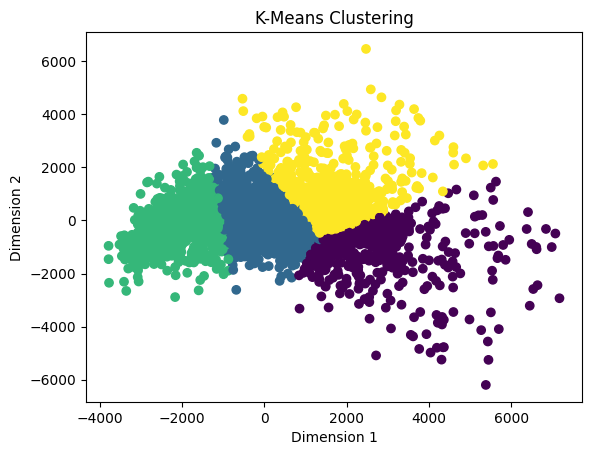

Fowlkes-Mallows score: 0.3418030618008875
Silhouette Coefficient: 0.38816887


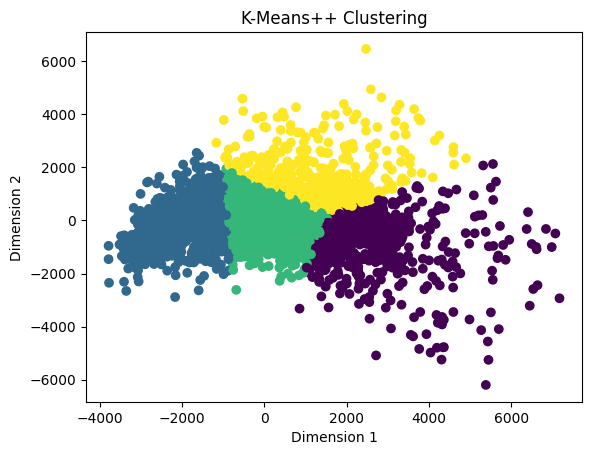

In [25]:
# K-MEANS CLUSTERING 
from sklearn.cluster import KMeans
from sklearn.metrics import fowlkes_mallows_score
from sklearn.metrics import silhouette_score

X = histograms_2dim


kmeans = KMeans(n_clusters=4, random_state=0, init="random", n_init="auto").fit(X)
labels = kmeans.labels_
kmeans.cluster_centers_

fm_score = fowlkes_mallows_score(classifications, labels)
print("Fowlkes-Mallows score:", fm_score)

silhouette_avg = silhouette_score(X, labels)
print("Silhouette Coefficient:", silhouette_avg)

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("K-Means Clustering")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()


kmeans2 = KMeans(n_clusters=4, random_state=0, init="k-means++", n_init="auto").fit(X)
labels2 = kmeans2.labels_
kmeans2.cluster_centers_

fm_score = fowlkes_mallows_score(classifications, labels2)
print("Fowlkes-Mallows score:", fm_score)

silhouette_avg = silhouette_score(X, labels2)
print("Silhouette Coefficient:", silhouette_avg)

plt.scatter(X[:, 0], X[:, 1], c=labels2)
plt.title("K-Means++ Clustering")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

# Source: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.fowlkes_mallows_score.html
# Soruce: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

Fowlkes-Mallows score: 0.3256738326449465
Silhouette Coefficient: 0.30911824


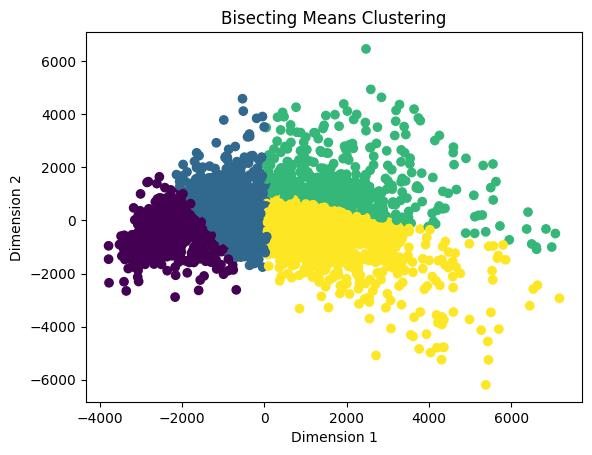

In [29]:
# BISECTING K-MEANS CLUSTERING 
from sklearn.cluster import BisectingKMeans
from sklearn.metrics import fowlkes_mallows_score
from sklearn.metrics import silhouette_score


bisect_means = BisectingKMeans(n_clusters=4, random_state=0, init="random").fit(X)
labels = bisect_means.labels_
bisect_means.cluster_centers_

fm_score = fowlkes_mallows_score(classifications, labels)
print("Fowlkes-Mallows score:", fm_score)

silhouette_avg = silhouette_score(X, labels)
print("Silhouette Coefficient:", silhouette_avg)

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("Bisecting Means Clustering")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

# Source: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.BisectingKMeans.html
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.fowlkes_mallows_score.html
# Soruce: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [ ]:
# DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.metrics import fowlkes_mallows_score
from sklearn.metrics import silhouette_score

clustering = DBSCAN(eps=1.8, min_samples=2).fit(X)
labels = clustering.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters:", n_clusters)

fm_score = fowlkes_mallows_score(classifications, labels)
print("Fowlkes-Mallows score:", fm_score)

silhouette_avg = silhouette_score(X, labels)
print("Silhouette Coefficient:", silhouette_avg)

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("DBSCAN")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

# Source: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.fowlkes_mallows_score.html
# Soruce: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [ ]:
# WARD'S METHOD HIERARCHICAL CLUSTERING
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import fowlkes_mallows_score
from sklearn.metrics import silhouette_score

clustering = AgglomerativeClustering(n_clusters=4).fit(X)
labels = clustering.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters:", n_clusters)

fm_score = fowlkes_mallows_score(classifications, labels)
print("Fowlkes-Mallows score:", fm_score)

silhouette_avg = silhouette_score(X, labels)
print("Silhouette Coefficient:", silhouette_avg)

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("Ward's Method Hierarchical Clustering")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

# Source: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.fowlkes_mallows_score.html
# Soruce: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [ ]:
# SINGLE LINK HIERARCHICAL CLUSTERING
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import fowlkes_mallows_score
from sklearn.metrics import silhouette_score

clustering = AgglomerativeClustering(n_clusters=4, linkage="single").fit(X)
labels = clustering.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters:", n_clusters)

fm_score = fowlkes_mallows_score(classifications, labels)
print("Fowlkes-Mallows score:", fm_score)

silhouette_avg = silhouette_score(X, labels)
print("Silhouette Coefficient:", silhouette_avg)

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("Single Link Hierarchical Clustering")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

# Source: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.fowlkes_mallows_score.html
# Soruce: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [ ]:
# COMPLETE LINK HIERARCHICAL CLUSTERING
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import fowlkes_mallows_score
from sklearn.metrics import silhouette_score

clustering = AgglomerativeClustering(n_clusters=4, linkage="complete").fit(X)
labels = clustering.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters:", n_clusters)

fm_score = fowlkes_mallows_score(classifications, labels)
print("Fowlkes-Mallows score:", fm_score)

silhouette_avg = silhouette_score(X, labels)
print("Silhouette Coefficient:", silhouette_avg)

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("Complete Link Clustering")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

# Source: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.fowlkes_mallows_score.html
# Soruce: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [ ]:
# AVERAGE LINK HIERARCHICAL CLUSTERING
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import fowlkes_mallows_score
from sklearn.metrics import silhouette_score

clustering = AgglomerativeClustering(n_clusters=4, linkage="average").fit(X)
labels = clustering.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters:", n_clusters)

fm_score = fowlkes_mallows_score(classifications, labels)
print("Fowlkes-Mallows score:", fm_score)

silhouette_avg = silhouette_score(X, labels)
print("Silhouette Coefficient:", silhouette_avg)

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("Average Link Clustering")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

# Source: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.fowlkes_mallows_score.html
# Soruce: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [ ]:
# The main difference between the Fowlkes-Mallows index and the Silhouette Coefficient is that the
# Fowlkes-Mallows index uses the actual labels of the images to determine how well they were labeled
# or classified whereas the Silhouette Coefficient just measures how well each data point fits into
# its assigned cluster and how distinct the clusters are from each other.


# Best:     Single Link HC
#           DBSCAN
#           Average Link HC
#           Complete Link HC
#           k-means++
#           Ward's Method HC
#           k-means (init=random)
# Worst:    Bisecting k-means 


# Best:     Single Link HC
#           Average Link HC
#           k-means++
#           k-means (init=random)
#           Complete Link HC
#           Ward's Method HC
#           Bisecting k-means
# Worst:    DBSCAN

# I think the Fowlkes-Mallows index is better for our dataset because we have the actual labels
# so we can assess how well our clustering algorithm is performing in terms of accurately grouping
# the data into the correct categories.

In [ ]:
# CLUSTERING WITHOUT USING PCA

file = r"C:\Users\Madeline\Documents\Data Mining\ProgrammingAssignment4\Weeds\*.jpg"
glob.glob(file)
images = [cv2.imread(image) for image in glob.glob(file)]
type(images)
histograms = []
for i in images:
    gray_image = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
    gray_hist = cv2.calcHist([gray_image], [0], None, [256], [0,256] )    
    histograms.append([gray_hist])    
x = np.array(histograms)
print(x.shape)
X = np.reshape(x, (4187,256))


# K-Means = 4
kmeans = KMeans(n_clusters=4, random_state=0, init="random", n_init="auto").fit(X)
labels = kmeans.labels_
kmeans.cluster_centers_

fm_score = fowlkes_mallows_score(classifications, labels)
print("K-Means Fowlkes-Mallows score:", fm_score)

silhouette_avg = silhouette_score(X, labels)
print("K-Means Silhouette Coefficient:", silhouette_avg)

# K-Means++
kmeans2 = KMeans(n_clusters=4, random_state=0, init="k-means++", n_init="auto").fit(X)
labels2 = kmeans2.labels_
kmeans2.cluster_centers_

fm_score = fowlkes_mallows_score(classifications, labels2)
print("K-Means++ Fowlkes-Mallows score:", fm_score)

silhouette_avg = silhouette_score(X, labels2)
print("K-Means++ Silhouette Coefficient:", silhouette_avg)

# Bisecting K Means
bisect_means = BisectingKMeans(n_clusters=4, random_state=0, init="random").fit(X)
labels = bisect_means.labels_
bisect_means.cluster_centers_

fm_score = fowlkes_mallows_score(classifications, labels)
print("Bisecting Means Fowlkes-Mallows score:", fm_score)

silhouette_avg = silhouette_score(X, labels)
print("Bisecting Means Silhouette Coefficient:", silhouette_avg)

# Spectral Clusering
clustering = SpectralClustering(n_clusters=4, assign_labels='discretize', random_state=0).fit(X)
labels = clustering.labels_

fm_score = fowlkes_mallows_score(classifications, labels)
print("Spectral Clustering Fowlkes-Mallows score:", fm_score)

silhouette_avg = silhouette_score(X, labels)
print("Spectral Clustering Silhouette Coefficient:", silhouette_avg)


In [ ]:

# Best:     k-means++
#           k-means
#           Bisecting means
# Worst:    Spectral Clustering


# Best:     k-means++
#           k-means
#           Bisecting means
# Worst:    Spectral Clustering


# The methods are performing better on the dimension reduced dataset. This is probably
# because PCA can help to identify the most important features in the data while reducing the 
# overall number of dimensions and probably reduces the noise of the dataset. Since we've 
# eliminated irrelevant or redundant features, we probably get better clustering. 